1-ფილმის ძიება 
2-ფილმის ამოშლა სიიდან 
3-ფილმის დამატება სიაში 
4-ფილმის აღწერის შეცვლა 
5-საინტერესო დიაგრამები 
6-exit 
: 1
შეიყვანეთ ჟანრი:  Horror


[('Suspiria',), ('Get Out',), ('Plan 9 from Outer Space',), ('Raw',), ('Army of Darkness',), ('The Lost Boys',), ('It Follows',), ('#Horror',)]


1-ფილმის ძიება 
2-ფილმის ამოშლა სიიდან 
3-ფილმის დამატება სიაში 
4-ფილმის აღწერის შეცვლა 
5-საინტერესო დიაგრამები 
6-exit 
: 2
შეიყვანეთ ფილმის სახელი, რომლის წაშლაც გსურთ სიიდან:  Suspiria


წაიშალა: Suspiria


1-ფილმის ძიება 
2-ფილმის ამოშლა სიიდან 
3-ფილმის დამატება სიაში 
4-ფილმის აღწერის შეცვლა 
5-საინტერესო დიაგრამები 
6-exit 
: 3
შეიტანეთ ფილმის სახელი:  Interstellar
შეიტანეთ ფილმის აღწერა:  dystopian future where Earth is becoming uninhabitable..


მონაცემები დაემატა!


1-ფილმის ძიება 
2-ფილმის ამოშლა სიიდან 
3-ფილმის დამატება სიაში 
4-ფილმის აღწერის შეცვლა 
5-საინტერესო დიაგრამები 
6-exit 
: 4
შეიყვანეთ ფილმის დასახელება, რომლის აღწერის შეცვლაც გსურთ:  Raw


('In Justine’s family everyone is a vet and a vegetarian. At 16, she’s a gifted teen ready to take on her first year in vet school, where her older sister also studies. There, she gets no time to settle: hazing starts right away. Justine is forced to eat raw meat for the first time in her life. Unexpected consequences emerge as her true self begins to form.',)


შეიტანეთ ახალი აღწერა:  ...


აღწერა შეიცვალა შემდეგით: 
('...',)


1-ფილმის ძიება 
2-ფილმის ამოშლა სიიდან 
3-ფილმის დამატება სიაში 
4-ფილმის აღწერის შეცვლა 
5-საინტერესო დიაგრამები 
6-exit 
: 5


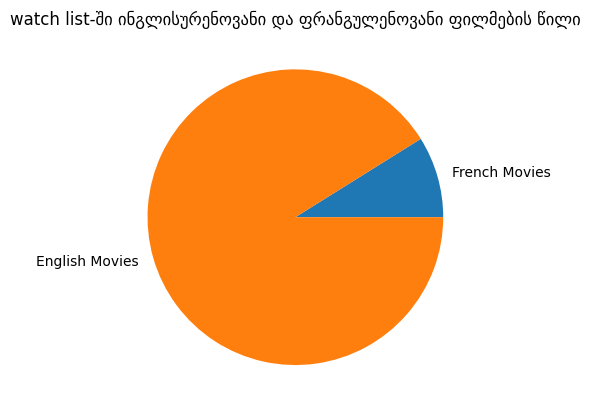

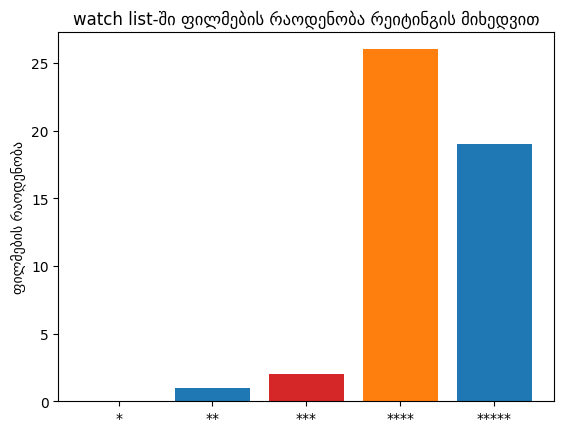

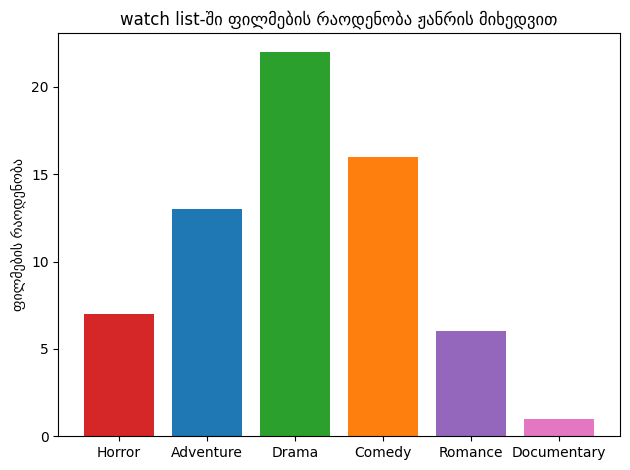

1-ფილმის ძიება 
2-ფილმის ამოშლა სიიდან 
3-ფილმის დამატება სიაში 
4-ფილმის აღწერის შეცვლა 
5-საინტერესო დიაგრამები 
6-exit 
: 6


In [1]:
import sqlite3
import matplotlib.pyplot as plt

c = sqlite3.connect('movie_database.sqlite3')
cursor = c.cursor()

# მომხმარებელი ჟანრის მიხედვით ეძებს სასურველ ფილმს
def movie_search():
    genre = input("შეიყვანეთ ჟანრი: ")
    print(cursor.execute("SELECT Film_title FROM Letterbox WHERE Genres LIKE ?", (f"%{genre}%",)).fetchall())

# მომხმარებელი ფილმის დასახელების მიხედვით ამოშლის ფილმს სიიდან
def movie_del():
    name = input('შეიყვანეთ ფილმის სახელი, რომლის წაშლაც გსურთ სიიდან: ')
    cursor.execute('DELETE FROM Letterbox WHERE Film_title = ?', (name,))
    print(f'წაიშალა: {name}')

# მომხმარებელი ამატებს ახალი ფილმის მონაცემებს სიაში
def movie_add():
    new_movie = input('შეიტანეთ ფილმის სახელი: ')
    new_movie_desc = input('შეიტანეთ ფილმის აღწერა: ')
    cursor.execute('INSERT INTO Letterbox (Film_title, Description) VALUES(?,?)', (new_movie, new_movie_desc))
    print('მონაცემები დაემატა!')

# მომხმარებელი ცვლის სიაში არსებული ფილმის აღწერას
def movie_desc():
    movie_name = input('შეიყვანეთ ფილმის დასახელება, რომლის აღწერის შეცვლაც გსურთ: ')
    print(cursor.execute('SELECT Description FROM Letterbox WHERE Film_title=?', (movie_name,)).fetchone())
    new_desc = input('შეიტანეთ ახალი აღწერა: ')
    cursor.execute('UPDATE Letterbox SET Description=? WHERE Film_title=?', (new_desc, movie_name))
    print('აღწერა შეიცვალა შემდეგით: \n' + str(cursor.execute('SELECT Description FROM Letterbox WHERE Film_title=?', (movie_name,)).fetchone()))

def diagr():
    # 1 წრიულ დიაგრამაზე ვიზუალურად ჩანს watch list-ში ფილმების წილი ინგლისურად და ფრანგულად
    french_movies = cursor.execute('SELECT COUNT(*) FROM Letterbox WHERE Original_language=?', ('French',)).fetchone()
    eng_movies = cursor.execute('SELECT COUNT(*) FROM Letterbox WHERE Original_language=?', ('English',)).fetchone()

    labels = 'French Movies', 'English Movies'
    sizes = [french_movies[0], eng_movies[0]]

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels)
    ax.set_title('watch list-ში ინგლისურენოვანი და ფრანგულენოვანი ფილმების წილი')

    plt.show()

    # 2 დიაგრამაზე ჩანს watch list-ში ფილმების რაოდენობა რეიტინგის მიხედვით
    rate_1 = cursor.execute('SELECT COUNT(*) FROM Letterbox WHERE Average_rating<=1').fetchone()[0]
    rate_2 = cursor.execute('SELECT COUNT(*) FROM Letterbox WHERE Average_rating<=2 AND Average_rating >1').fetchone()[0]
    rate_3 = cursor.execute('SELECT COUNT(*) FROM Letterbox WHERE Average_rating<=3 AND Average_rating >2').fetchone()[0]
    rate_4 = cursor.execute('SELECT COUNT(*) FROM Letterbox WHERE Average_rating<=4 AND Average_rating >3').fetchone()[0]
    rate_5 = cursor.execute('SELECT COUNT(*) FROM Letterbox WHERE Average_rating<=5 AND Average_rating >4').fetchone()[0]

    fig, ax = plt.subplots()

    rates = '*', '**', '***', '****', '*****'
    counts = [rate_1, rate_2, rate_3, rate_4, rate_5]
    bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange', 'tab:blue']

    ax.bar(rates, counts, color=bar_colors)

    ax.set_ylabel('ფილმების რაოდენობა')
    ax.set_title('watch list-ში ფილმების რაოდენობა რეიტინგის მიხედვით')

    plt.show()

    # 3 დიაგრამაზე ჩანს watch list-ში ფილმების რაოდენობა ჟანრის მიხედვით
    counts = {'Horror': 0, 'Adventure': 0, 'Drama': 0, 'Comedy': 0, 'Romance': 0, 'Documentary': 0}
    for row in cursor.execute("SELECT Genres FROM Letterbox"):
        if row[0] is None:
            continue
        genre_str = row[0][1:-1]  # მოვაცილოთ []
        genre_list = genre_str.split(', ')

        for g in genre_list:
            g = g.strip("'")
            if g in counts:
                counts[g] += 1

    genres = list(counts.keys())
    counts_list = list(counts.values())
    bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:purple', 'tab:pink']

    fig, ax = plt.subplots()
    ax.bar(genres, counts_list, color=bar_colors)
    ax.set_ylabel('ფილმების რაოდენობა')
    ax.set_title('watch list-ში ფილმების რაოდენობა ჟანრის მიხედვით')
    plt.tight_layout()

    plt.show()


while True:
    user_input = input("1-ფილმის ძიება \n2-ფილმის ამოშლა სიიდან \n3-ფილმის დამატება სიაში \n4-ფილმის აღწერის შეცვლა "
                       "\n5-საინტერესო დიაგრამები \n6-exit \n:")
    if user_input == '1':
        movie_search()
    elif user_input == '2':
        movie_del()
    elif user_input == '3':
        movie_add()
    elif user_input == '4':
        movie_desc()
    elif user_input == '5':
        diagr()
    elif user_input == '6':
        break
    else:
        print('გთხოვთ, შეიტანოთ ციფრი 1-დან 6-ის ჩათვლით')


c.commit()
c.close()